# Chessboard Vision Project  

## 📌 Introduction  
This project is part of the **Computer Vision** course in the Master's in Artificial Intelligence. The goal is to detect chess pieces on a board from images, determine their positions using bounding boxes, and represent them in an 8x8 matrix format. The solution is implemented in Python and follows a structured image processing pipeline.

## 🎯 Task Overview  
- **Input:** Chessboard image  
- **Output:**  
  - Total number of black/white pieces  
  - Bounding boxes around detected pieces  
  - 8x8 matrix representing piece positions  
- **Dataset:** 50 images for development, 10 unseen test images  
- **Deliverables:**  
  - Python script (single file)  
  - Short report (max 2 pages) 

---

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import math

# Data Directory
dataDir = 'images'

# Define the window size
window_width = 800
window_height = 600

---

## First Image Test

In [16]:
# Function to resize image
def resize_image(image, window_width, window_height):
    height, width = image.shape[:2]
    scaling_factor = min(window_width / width, window_height / height)
    return cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

Image Dimensions: 3024 x 3024
Number of Channels: 3


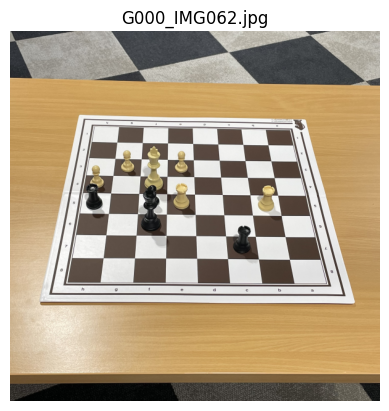

In [100]:
# Read and Display an Image
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'G038_IMG105.jpg'))

# Get the dimensions of the image
height, width, channels = img.shape
print(f'Image Dimensions: {height} x {width}')
print(f'Number of Channels: {channels}')

# Calculate the scaling factor
scaling_factor = min(window_width / width, window_height / height)

# Resize the image
resized_img = resize_image(img, window_width, window_height)

# Display the resized image using matplotlib
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('G000_IMG062.jpg')
plt.axis('off')
plt.show()

---

## Image Processing

### 1. Convert to Graysacale

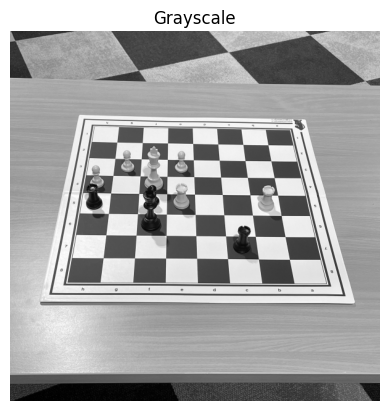

In [92]:
# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize image for display
resized_gray = resize_image(gray, window_width, window_height)

# Display Grayscale Image
plt.imshow(resized_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

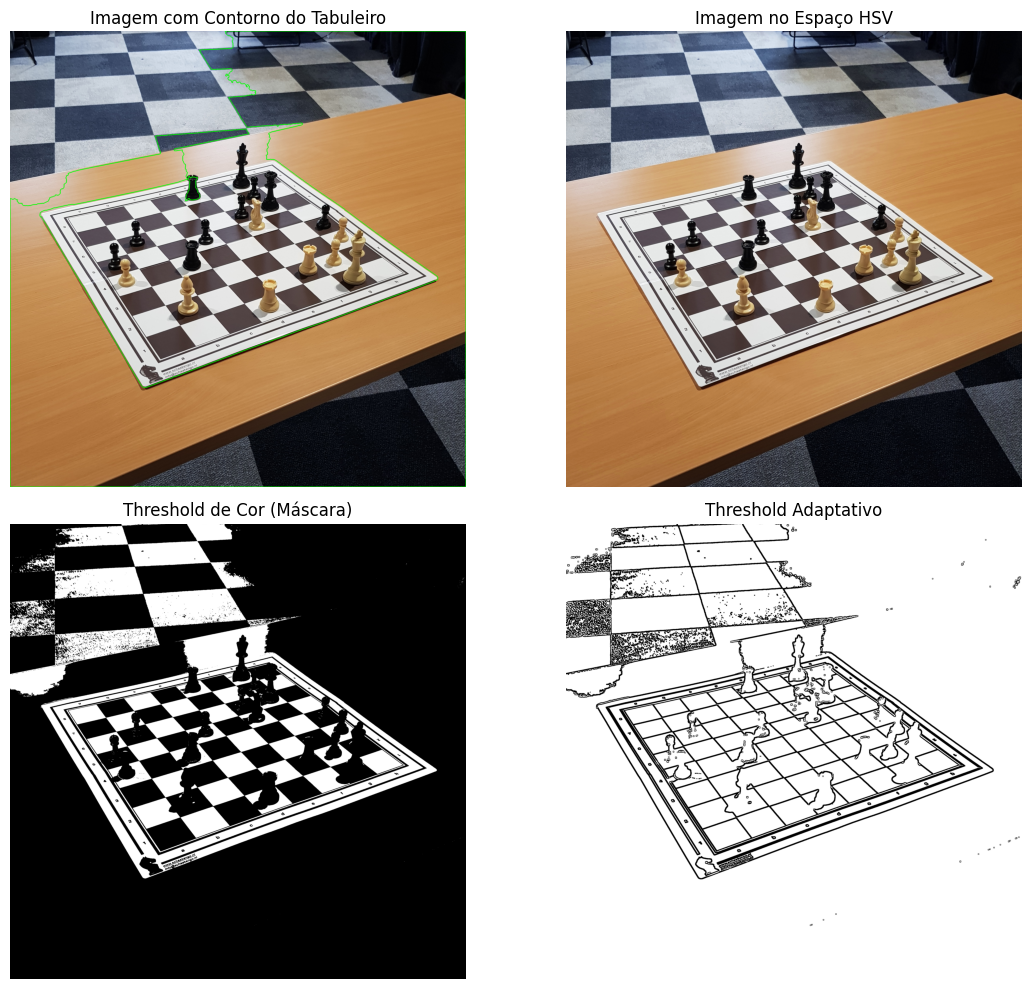

In [227]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Carregar a imagem
img = img

# Passo 2: Converter a imagem para o espaço de cor HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Passo 3: Definir um intervalo de valores para o threshold de cor
# Ajuste os valores para capturar as cores do tabuleiro
# Vamos assumir que o tabuleiro é composto por branco (alto valor de V) e preto (baixo valor de V)
lower_black = np.array([0, 0, 0])
upper_black = np.array([0, 0, 0])

# Intervalo para o branco (matiz: 0-180, saturação: 0-100, valor: 200-255)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# Passo 4: Aplicar o threshold de cor
mask_black = cv2.inRange(hsv_img, lower_black, upper_black)
mask_white = cv2.inRange(hsv_img, lower_white, upper_white)

mask = cv2.bitwise_or(mask_black, mask_white)
# Passo 5: Aplicar um filtro Gaussiano para suavizar a imagem (ajuda a reduzir reflexões)
smoothed_img = cv2.GaussianBlur(mask, (5, 5), 0)

# Passo 6: Equalizar o histograma da imagem suavizada
equalized_img = cv2.equalizeHist(smoothed_img)

# Passo 7: Aplicar thresholding adaptativo para lidar com variações de iluminação
adaptive_threshold_img = cv2.adaptiveThreshold(equalized_img, 255, 
                                              cv2.ADAPTIVE_THRESH_MEAN_C, 
                                              cv2.THRESH_BINARY, 
                                              11, 2)

# Passo 8: Encontrar contornos da imagem resultante
contours, _ = cv2.findContours(adaptive_threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Passo 9: Desenhar o contorno do tabuleiro
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(img, [largest_contour], -1, (0, 255, 0), 3)

# Passo 10: Exibir os resultados
plt.figure(figsize=(12, 10))

# Imagem original com o contorno do tabuleiro
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Contorno do Tabuleiro')
plt.axis('off')

# Imagem em HSV
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
plt.title('Imagem no Espaço HSV')
plt.axis('off')

# Imagem com o threshold de cor aplicado
plt.subplot(2, 2, 3)
plt.imshow(mask, cmap='gray')
plt.title('Threshold de Cor (Máscara)')
plt.axis('off')

# Imagem com threshold adaptativo
plt.subplot(2, 2, 4)
plt.imshow(adaptive_threshold_img, cmap='gray')
plt.title('Threshold Adaptativo')
plt.axis('off')

plt.tight_layout()
plt.show()


In [268]:
import cv2 as cv
import numpy as np
# My fucntions
import my_functions

upper_TH_level=180
lower_TH_level=150
image_path = os.path.join(dataDir, 'G087_IMG093.jpg')
# Step 2: Read the image using OpenCV
img = cv2.imread(image_path)
frame_BGR_resized = my_functions.resize_image(img, 10)
frame_BGR_resized_2=frame_BGR_resized

frame_GRAY = cv.cvtColor(frame_BGR_resized, cv.COLOR_BGR2GRAY)
frame_canny= cv.Canny(frame_GRAY, lower_TH_level, upper_TH_level)

lines = cv.HoughLinesP(frame_canny, 1, np.pi / 90, 80, minLineLength=100, maxLineGap=25)
if lines is None:
    print("error, image has no lines")

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(frame_BGR_resized_2, (x1, y1), (x2, y2), (0, 255, 0), 2)

Hough_points = my_functions.hough_square_absolute_maximum(lines)
frame_BGR_Cropped = frame_BGR_resized[Hough_points[1]:Hough_points[3], Hough_points[0]:Hough_points[2]]

my_functions.open_in_location(frame_BGR_resized, "Original Frame Scaled", 0, 10)
my_functions.open_in_location(frame_canny, "Canny Edge", 400, 10)
my_functions.open_in_location(frame_BGR_resized_2, "Hough Lines", 800, 10)
my_functions.open_in_location(frame_BGR_Cropped, "Original Frame Cropped", 1200, 10)

cv.waitKey()
cv.destroyAllWindows()

In [270]:
image_path = os.path.join(dataDir, 'G087_IMG093.jpg')
# Step 2: Read the image using OpenCV
img = cv2.imread(image_path)
frame_BGR_resized = my_functions.resize_image(img, 10)
frame_BGR_resized_2=frame_BGR_resized
my_functions.open_in_location(frame_BGR_resized, "Original Frame Scaled", 0, 10)

frame_GRAY = cv.cvtColor(frame_BGR_resized, cv.COLOR_BGR2GRAY)
frame_GRAY_blured=cv.GaussianBlur(frame_GRAY,(5,5),0)

GRAY_corners = cv.goodFeaturesToTrack(frame_GRAY, 100, 0.4, 5)
corners_array = np.intp(GRAY_corners)


#Display the corners found int he image

for i in corners_array:
    x, y = i.ravel()
    cv.circle(frame_BGR_resized_2, (x, y), 3, [255, 255, 0], -1)



#frame_GRAY_cropped = my_functions.crop_image(frame_GRAY, corners_array)
frame_BGR_cropped= my_functions.crop_image(frame_BGR_resized,corners_array)


my_functions.open_in_location(frame_BGR_resized_2, "Shi Tomasi Corners", 400, 10)
my_functions.open_in_location(frame_BGR_cropped, "Original Frame Cropped", 800, 10)

cv.waitKey()
cv.destroyAllWindows()

In [272]:
THRESHOLDING_window=11
image_path = os.path.join(dataDir, 'G087_IMG093.jpg')
# Step 2: Read the image using OpenCV
img = cv2.imread(image_path)

frame_BGR_resized = my_functions.resize_image(img, 10)

frame_GRAY = cv.cvtColor(frame_BGR_resized, cv.COLOR_BGR2GRAY)
frame_GRAY_blured = cv.GaussianBlur(frame_GRAY, (5, 5), 0)
frame_THRESHOLDED = cv.adaptiveThreshold(frame_GRAY_blured, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv.THRESH_BINARY_INV, THRESHOLDING_window, 2)

contours, hierarchy = cv.findContours(frame_THRESHOLDED, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

largest_contour_index = my_functions.get_contour_max_area(contours)[0]

# only print if interested
# print(largest_contour_index)


largest_contoured_polygon = cv.approxPolyDP(contours[largest_contour_index],
                                            0.05 * cv.arcLength(contours[largest_contour_index], True), True)

frame_BGR_cropped = my_functions.crop_image(frame_BGR_resized, largest_contoured_polygon)

# Displaying images except the original before resizing
my_functions.open_in_location(frame_BGR_resized, "Original Frame Scaled", 0, 10)
my_functions.open_in_location(frame_GRAY_blured, "Gray Filtered Frame", 400, 10)
my_functions.open_in_location(frame_THRESHOLDED, "Thresholded Frame", 800, 10)
my_functions.open_in_location(frame_BGR_cropped, "Original Frame Cropped", 1200, 10)

cv.waitKey()
cv.destroyAllWindows()

In [276]:
image_path = os.path.join(dataDir, 'G087_IMG093.jpg')
# Step 2: Read the image using OpenCV
img = cv2.imread(image_path)
frame_BGR_resized = my_functions.resize_image(img, 100)
frame_BGR_resized_2=frame_BGR_resized
#my_functions.open_in_location(frame_BGR_resized, "Original Frame Scaled", 0, 10)


frame_GRAY = cv.cvtColor(frame_BGR_resized, cv.COLOR_BGR2GRAY)
frame_GRAY_blured=cv.GaussianBlur(frame_GRAY,(5,5),0)

GRAY_corners = cv.goodFeaturesToTrack(frame_GRAY, 100, 0.4, 5)
corners_array = np.intp(GRAY_corners)


#Display the corners found int he image

for i in corners_array:
    x, y = i.ravel()
    cv.circle(frame_BGR_resized_2, (x, y), 3, [255, 255, 0], -1)



#frame_GRAY_cropped = my_functions.crop_image(frame_GRAY, corners_array)
frame_BGR_cropped= my_functions.crop_image(frame_BGR_resized,corners_array)


my_functions.open_in_location(frame_BGR_resized_2, "Shi Tomasi Corners", 00, 10)
my_functions.open_in_location(frame_BGR_cropped, "Original Frame Cropped", 800, 10)
cv.destroyAllWindows()

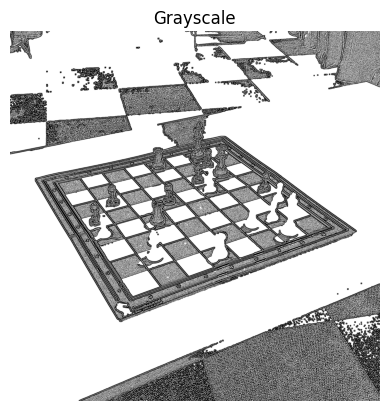

In [255]:
import numpy as np
import cv2
import os

# Step 1: Specify the directory and the image filename
image_path = os.path.join(dataDir, 'G087_IMG093.jpg')
# Step 2: Read the image using OpenCV
img = cv2.imread(image_path)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
hsv_img = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
# Intervalo para o preto (matiz: 0-180, saturação: 0-255, valor: 0-100)
lower_black = np.array([0, 0, 0])    # Lower bound for black color in HSV
upper_black = np.array([180, 255, 50])

# Intervalo para o branco (matiz: 0-180, saturação: 0-100, valor: 200-255)
lower_white = np.array([0, 0, 200])  # Lower bound for white color in HSV
upper_white = np.array([180, 20, 255])

# Passo 4: Criar a máscara para as cores preta e branca
mask_black = cv2.inRange(hsv_img, lower_black, upper_black)
mask_white = cv2.inRange(hsv_img, lower_white, upper_white)

# Passo 5: Unir as máscaras (detectar tanto o preto quanto o branco)
mask = cv2.bitwise_or(mask_black, mask_white)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Passo 6: Aplicar a máscara na imagem original
result = cv2.bitwise_and(img, img, mask=mask)

gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Step 2: Define a custom Sobel-Feldman-like kernel (modify the coefficients as needed)
sobel_feldman_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Modify the kernel coefficients
sobel_feldman_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Modify the kernel coefficients

# Step 3: Apply custom convolution (Sobel-Feldman) using filter2D
sobel_feldman_x_result = cv2.filter2D(gray_result, -1, sobel_feldman_x)
sobel_feldman_y_result = cv2.filter2D(gray_result, -1, sobel_feldman_y)

# Convert to 32F (float) before calculating magnitude
sobel_feldman_x_result = np.float32(sobel_feldman_x_result)
sobel_feldman_y_result = np.float32(sobel_feldman_y_result)

# Step 4: Compute the magnitude of the gradient (edge strength)
sobel_feldman_magnitude = cv2.magnitude(sobel_feldman_x_result, sobel_feldman_y_result)

# Step 5: Normalize the magnitude to 8-bit (optional)
sobel_feldman_magnitude = cv2.convertScaleAbs(sobel_feldman_magnitude)

adaptive_threshold_img = cv2.adaptiveThreshold(sobel_feldman_magnitude, 255, 
                                            cv2.ADAPTIVE_THRESH_MEAN_C, 
                                            cv2.THRESH_BINARY, 
                                            11, 2)

plt.imshow(adaptive_threshold_img, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()


### 2. Apply Gaussian Blur

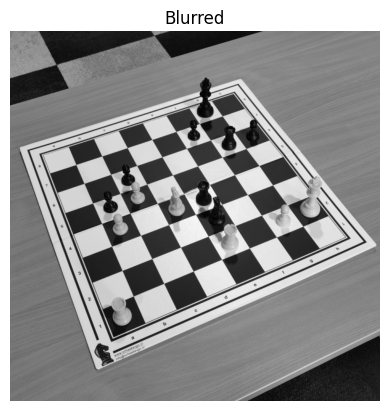

In [29]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Resize image for display
resized_blurred = resize_image(blurred, window_width, window_height)

# Display Blurred Image
plt.imshow(resized_blurred, cmap='gray')
plt.title("Blurred")
plt.axis('off')
plt.show()

### 3. Apply Adaptive Thresholding

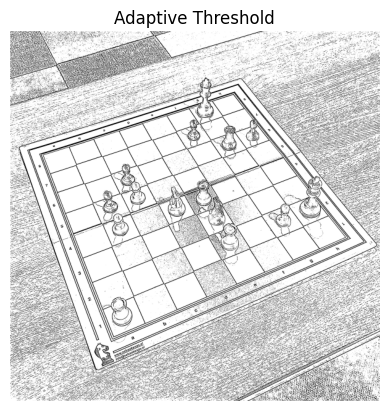

In [30]:
# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Resize image for display
resized_adaptive_thresh = resize_image(adaptive_thresh, window_width, window_height)

# Display Adaptive Threshold Image
plt.imshow(resized_adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')
plt.show()

### 4. Apply Canny Edge Detection

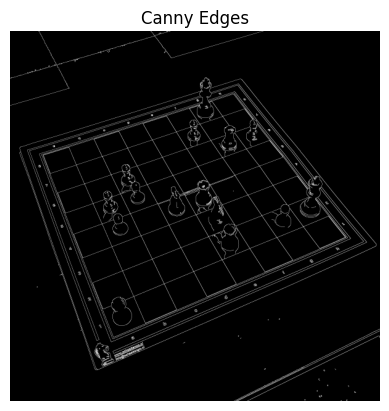

In [31]:
# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Resize image for display
resized_edges = resize_image(edges, window_width, window_height)

# Display Canny Edges Image
plt.imshow(resized_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()

### 5. Apply Sobel Filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


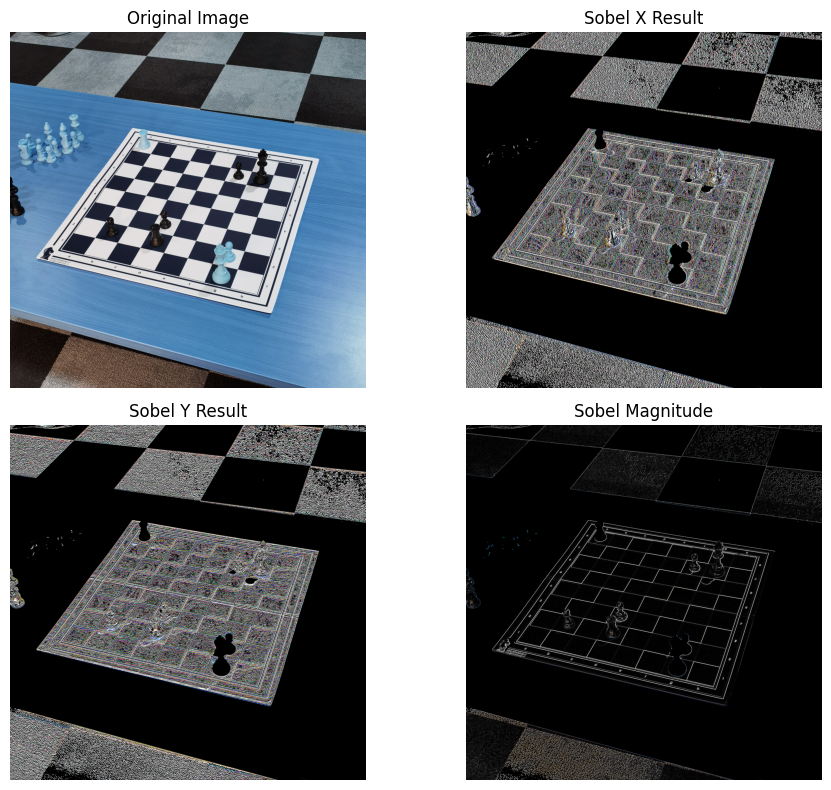

In [3]:
# Apply Sobel filters in x and y directions
from scipy.ndimage import convolve
# Carregar a imagem
img = cv2.imread(os.path.join(dataDir, 'G000_IMG102.jpg'))

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Intervalo para o preto (matiz: 0-180, saturação: 0-255, valor: 0-100)
lower_black = np.array([0, 0, 0])
upper_black = np.array([160, 255, 100])

# Intervalo para o branco (matiz: 0-180, saturação: 0-100, valor: 200-255)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 15, 255])

# Passo 4: Criar a máscara para as cores preta e branca
mask_black = cv2.inRange(hsv_img, lower_black, upper_black)
mask_white = cv2.inRange(hsv_img, lower_white, upper_white)

# Passo 5: Unir as máscaras (detectar tanto o preto quanto o branco)
mask = cv2.bitwise_or(mask_black, mask_white)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Passo 6: Aplicar a máscara na imagem original
result = cv2.bitwise_and(img, img, mask=mask)

# Step 2: Define a custom Sobel-Feldman-like kernel (modify the coefficients as needed)
sobel_feldman_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Modify the kernel coefficients
sobel_feldman_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Modify the kernel coefficients

# Step 3: Apply custom convolution (Sobel-Feldman) using filter2D
sobel_feldman_x_result = cv2.filter2D(result, -1, sobel_feldman_x)
sobel_feldman_y_result = cv2.filter2D(result, -1, sobel_feldman_y)

# Convert to 32F (float) before calculating magnitude
sobel_feldman_x_result = np.float32(sobel_feldman_x_result)
sobel_feldman_y_result = np.float32(sobel_feldman_y_result)

# Step 4: Compute the magnitude of the gradient (edge strength)
sobel_feldman_magnitude = cv2.magnitude(sobel_feldman_x_result, sobel_feldman_y_result)

# Step 5: Normalize the magnitude to 8-bit (optional)
sobel_feldman_magnitude = cv2.convertScaleAbs(sobel_feldman_magnitude)
plt.figure(figsize=(10, 8))
# Step 6: Show the result
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Second subplot (top-right) - Sobel X result
plt.subplot(2, 2, 2)
plt.imshow(sobel_feldman_x_result, cmap='gray')
plt.title('Sobel X Result')
plt.axis('off')

# Third subplot (bottom-left) - Sobel Y result
plt.subplot(2, 2, 3)
plt.imshow(sobel_feldman_y_result, cmap='gray')
plt.title('Sobel Y Result')
plt.axis('off')

# Fourth subplot (bottom-right) - Sobel Magnitude result
plt.subplot(2, 2, 4)
plt.imshow(sobel_feldman_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

### Canny edge detector

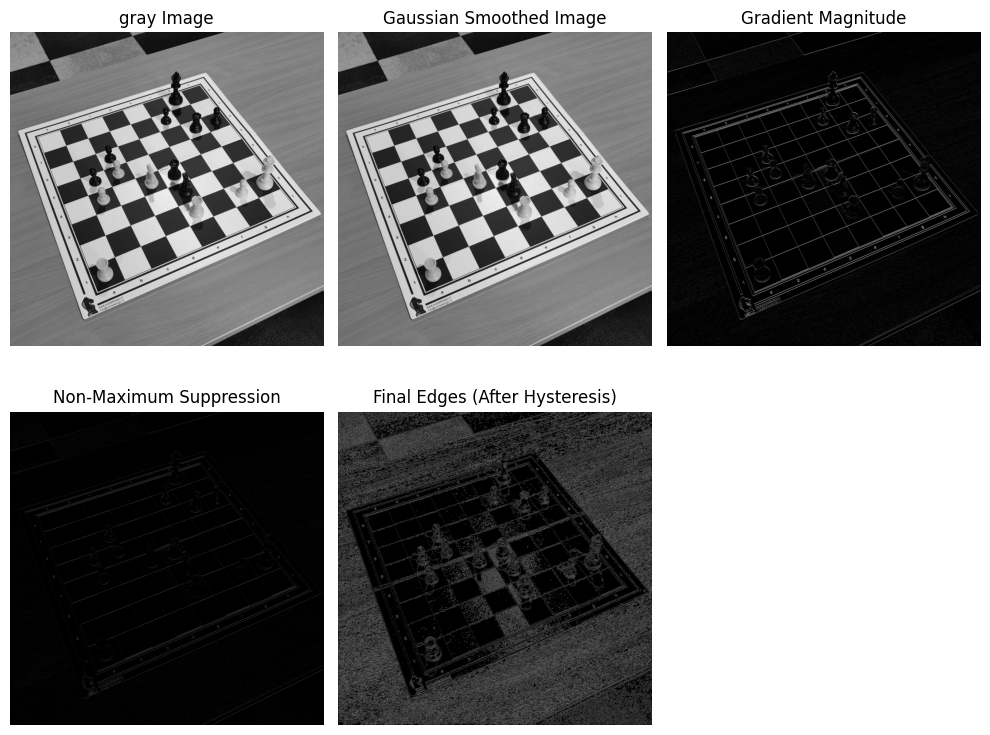

In [83]:
# Step 1: Load the image (grayscale)
img = cv2.imread(os.path.join(dataDir, 'G000_IMG062.jpg'), cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian smoothing using cv2.GaussianBlur
# Kernel size (e.g., 5x5) and sigma (standard deviation)
gaussian_smoothed = cv2.GaussianBlur(img, (5, 5), 0)


# Step 3: Apply Sobel filters to compute the horizontal and vertical gradients
sobel_x = cv2.Sobel(gaussian_smoothed, cv2.CV_64F, 1, 0, ksize=1)  # Horizontal gradient (Sobel X)
sobel_y = cv2.Sobel(gaussian_smoothed, cv2.CV_64F, 0, 1, ksize=5)  # Vertical gradient (Sobel Y)

# Step 4: Compute the gradient magnitude
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)
gradient_direction = cv2.phase(sobel_x, sobel_y, angleInDegrees=True)

# Step 5: Non-Maximum Suppression
height, width = gradient_magnitude.shape
nms_result = np.zeros_like(gradient_magnitude)

# Step 6: Iterate through all pixels and apply non-maximum suppression
for i in range(1, height - 1):
    for j in range(1, width - 1):
        angle = gradient_direction[i, j]
        magnitude = gradient_magnitude[i, j]
        
        # Normalize angle to 0, 45, 90, or 135 degrees
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            # 0 degrees: Compare left and right neighbors
            neighbor1 = gradient_magnitude[i, j - 1]
            neighbor2 = gradient_magnitude[i, j + 1]
        elif (22.5 <= angle < 67.5):
            # 45 degrees: Compare top-right and bottom-left neighbors
            neighbor1 = gradient_magnitude[i - 1, j + 1]
            neighbor2 = gradient_magnitude[i + 1, j - 1]
        elif (67.5 <= angle < 112.5):
            # 90 degrees: Compare top and bottom neighbors
            neighbor1 = gradient_magnitude[i - 1, j]
            neighbor2 = gradient_magnitude[i + 1, j]
        else:
            # 135 degrees: Compare top-left and bottom-right neighbors
            neighbor1 = gradient_magnitude[i - 1, j - 1]
            neighbor2 = gradient_magnitude[i + 1, j + 1]

        # Suppress non-maximum values
        if (magnitude >= neighbor1) and (magnitude >= neighbor2):
            nms_result[i, j] = magnitude
        else:
            nms_result[i, j] = 0

# Step 5: Apply Thresholding to classify edges
threshold_H = 100  # Higher threshold for strong edges
threshold_L = 50   # Lower threshold for weak edges

# Initialize the edge classification
strong_edges = np.zeros_like(nms_result)
weak_edges = np.zeros_like(nms_result)
suppressed_edges = np.zeros_like(nms_result)

# Classify edges based on the threshold values
strong_edges[nms_result >= threshold_H] = 255  # Strong edges
weak_edges[(nms_result >= threshold_L) & (nms_result < threshold_H)] = 255  # Weak edges
suppressed_edges[nms_result < threshold_L] = 0  # Suppressed edges

# Step 6: Edge Tracking by Hysteresis
final_edges = np.zeros_like(nms_result)

# Step 6.1: Perform edge tracking by connecting weak edges to strong edges
height, width = strong_edges.shape

def trace_edge(i, j):
    # Recursive function to link weak edges to strong edges
    if weak_edges[i, j] == 255:
        final_edges[i, j] = 255
        weak_edges[i, j] = 0  # Mark as processed
        
        # Check the 8 neighbors to link weak edges
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                ni, nj = i + dx, j + dy
                if 0 <= ni < height and 0 <= nj < width and final_edges[ni, nj] == 0:
                    trace_edge(ni, nj)

# Link weak edges connected to strong edges
for i in range(1, height - 1):
    for j in range(1, width - 1):
        if strong_edges[i, j] == 255:
            # Check 8 neighbors for weak edges to link
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    ni, nj = i + dx, j + dy
                    if weak_edges[ni, nj] == 255:
                        trace_edge(ni, nj)

# Final edges: strong edges and weak edges connected to strong edges
final_edges = np.maximum(final_edges, strong_edges)

# Step 3: Show the original image and smoothed image side by side
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('gray Image')
plt.axis('off')

# Smoothed image
plt.subplot(2, 3, 2)
plt.imshow(gaussian_smoothed, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Non-maximum suppression result
plt.subplot(2, 3, 4)
plt.imshow(nms_result, cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')

# Final edges after hysteresis
plt.subplot(2, 3, 5)
plt.imshow(final_edges, cmap='gray')
plt.title('Final Edges (After Hysteresis)')
plt.axis('off')

plt.tight_layout()
plt.show()

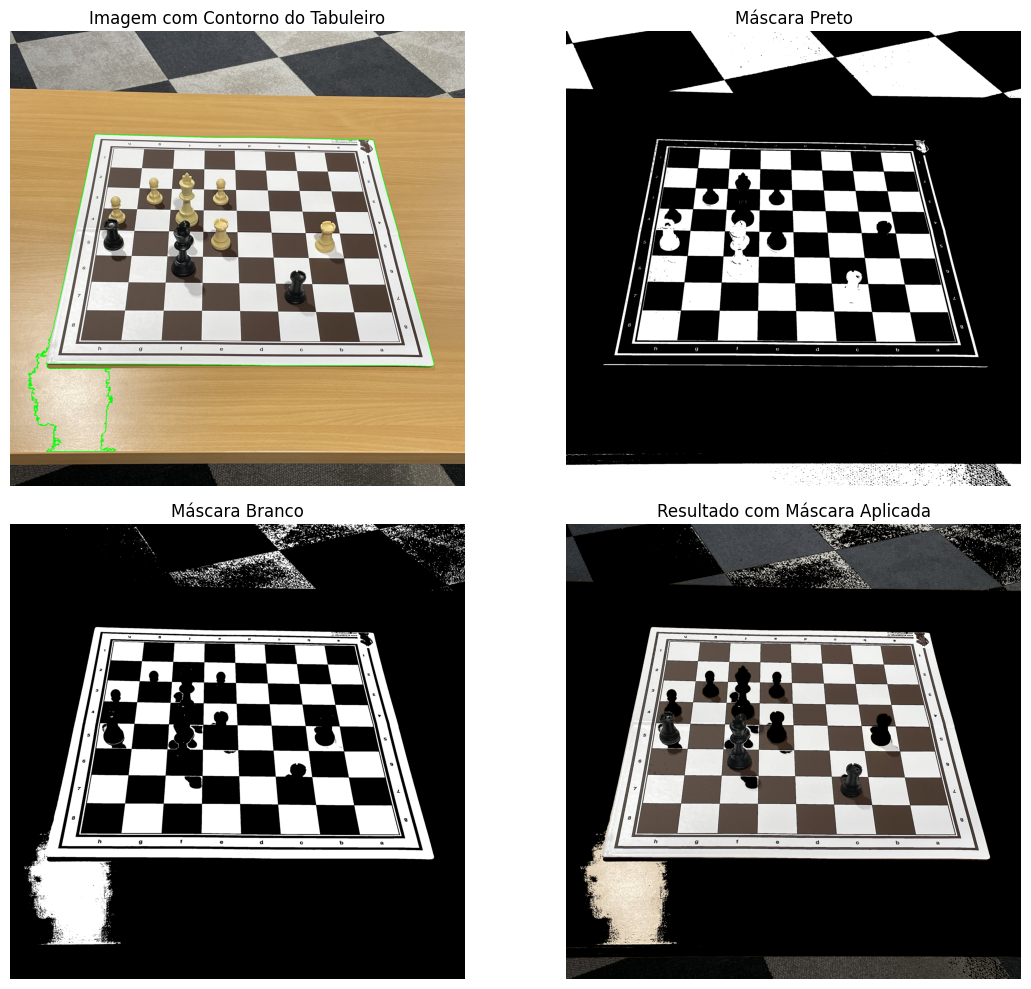

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Carregar a imagem
img = cv2.imread('sua_imagem.jpg')

# Passo 2: Converter a imagem para o espaço de cor HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Passo 3: Definir o intervalo de cores para o tabuleiro (branco e preto)
# Intervalo de cores para as quadrículas do tabuleiro de xadrez (branco e preto)
# O valor do intervalo pode ser ajustado conforme necessário para a sua imagem.

# Intervalo para o preto (matiz: 0-180, saturação: 0-255, valor: 0-100)
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 100])

# Intervalo para o branco (matiz: 0-180, saturação: 0-100, valor: 200-255)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# Passo 4: Criar a máscara para as cores preta e branca
mask_black = cv2.inRange(hsv_img, lower_black, upper_black)
mask_white = cv2.inRange(hsv_img, lower_white, upper_white)

# Passo 5: Unir as máscaras (detectar tanto o preto quanto o branco)
mask = cv2.bitwise_or(mask_black, mask_white)

# Passo 6: Aplicar a máscara na imagem original
result = cv2.bitwise_and(img, img, mask=mask)

# Passo 7: Encontrar contornos (potencial contorno do tabuleiro)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Passo 8: Desenhar os contornos na imagem original (detecção do tabuleiro)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)  # Escolher o maior contorno
    cv2.drawContours(img, [largest_contour], -1, (0, 255, 0), 3)  # Desenhar contorno em verde

# Passo 9: Exibir as imagens
plt.figure(figsize=(12, 10))

# Imagem original
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Contorno do Tabuleiro')
plt.axis('off')

# Máscara para preto
plt.subplot(2, 2, 2)
plt.imshow(mask_black, cmap='gray')
plt.title('Máscara Preto')
plt.axis('off')

# Máscara para branco
plt.subplot(2, 2, 3)
plt.imshow(mask_white, cmap='gray')
plt.title('Máscara Branco')
plt.axis('off')

# Resultado final
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Resultado com Máscara Aplicada')
plt.axis('off')

plt.tight_layout()
plt.show()


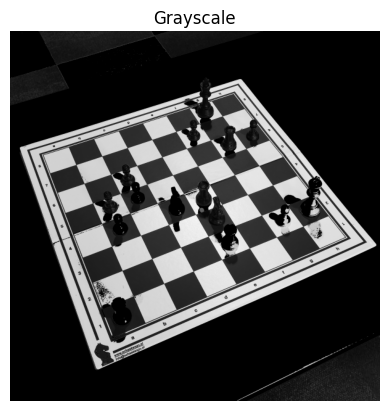

In [86]:
# Convert to Grayscale
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Resize image for display
resized_gray = resize_image(gray, window_width, window_height)

# Display Grayscale Image
plt.imshow(resized_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-177.7099609375..139.5015869140625].


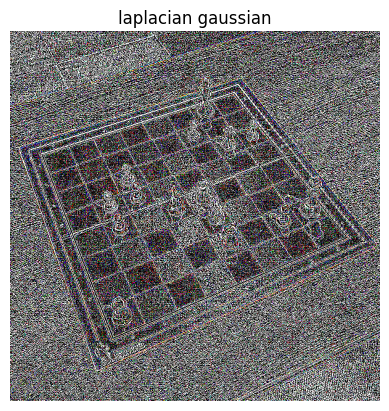

In [40]:
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
# Resize image for display
resized_laplacian = resize_image(laplacian, window_width, window_height)

# Display Canny Edges Image
plt.imshow(resized_laplacian, cmap='gray')
plt.title("laplacian gaussian")
plt.axis('off')
plt.show()

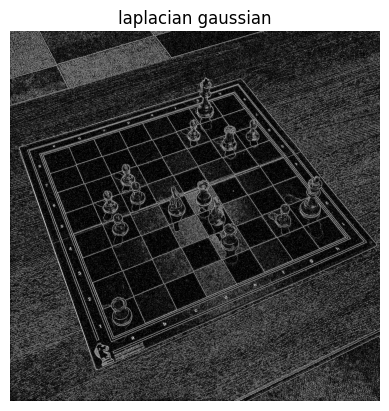

In [45]:
# Open image
img = cv2.imread(os.path.join(dataDir, 'G000_IMG062.jpg')) # Change this, according to your image's path

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian_1 = cv2.GaussianBlur(img, (3, 3), 0, 0)
gaussian_2 = cv2.GaussianBlur(img, (5, 5), 0, 0)

difference_of_gaussians = gaussian_1 - gaussian_2

plt.imshow(difference_of_gaussians, cmap='gray')
plt.title("laplacian gaussian")
plt.axis('off')
plt.show()

Sobel-feldman operator

### Test function

In [ ]:
def process_image(image_path, display=True):
    """
    Process chessboard image to detect and extract the chessboard.
    """
    # Load image
    img = cv2.imread(image_path)
    blur = cv2.GaussianBlur(img, (3, 3), 3)
    #brightness_reduced = cv2.convertScaleAbs(img, alpha=0.8, beta=-50)
    hsv_img = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)


    # Intervalo para o preto (matiz: 0-180, saturação: 0-255, valor: 0-100)
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 100])

    # Intervalo para o branco (matiz: 0-180, saturação: 0-100, valor: 200-255)
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([140, 15, 255])

    # Passo 4: Criar a máscara para as cores preta e branca
    mask_black = cv2.inRange(hsv_img, lower_black, upper_black)
    mask_white = cv2.inRange(hsv_img, lower_white, upper_white)

    # Passo 5: Unir as máscaras (detectar tanto o preto quanto o branco)
    mask = cv2.bitwise_or(mask_black, mask_white)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Passo 6: Aplicar a máscara na imagem original
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # Convert to grayscale and blur
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    blurred = gray
    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Sobel filters
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
    abs_sobelx = cv2.convertScaleAbs(sobelx)
    abs_sobely = cv2.convertScaleAbs(sobely)
    
    # Try different Sobel weights
    weights = [(v, v) for v in np.arange(0.29, 2.1, 0.1)]
    chessboard_contour = None
    
    # Find chessboard contour
    for wx, wy in weights:
        sobel_combined = cv2.addWeighted(abs_sobelx, wx, abs_sobely, wy, 0)
        _, thresh_sobel = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh_sobel, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contour_img = img.copy()
            
        # Sort by area, get largest
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:25]
            
        for contour in contours:
            peri = cv2.arcLength(contour, True)
            for approx_param in [0.01, 0.02, 0.03, 0.04, 0.05]:
                approx = cv2.approxPolyDP(contour, approx_param * peri, True)
                
                # Check if it's a quadrilateral with appropriate area
                if len(approx) == 4 and cv2.contourArea(approx) > (img.shape[0] * img.shape[1]) * 0.15:
                    chessboard_contour = approx
                    print(f"Found chessboard in {os.path.basename(image_path)} with weights ({wx}, {wy}), approx {approx_param}")
                    break
            if chessboard_contour is not None:
                break

            
        if chessboard_contour is not None:
            break
    
    # Process the chessboard if found
    if chessboard_contour is not None:
        cv2.drawContours(contour_img, [chessboard_contour], -1, (0, 255, 0), 3)
        
        # Perspective transform
        rect = np.zeros((4, 2), dtype="float32")
        pts = chessboard_contour.reshape(4, 2)
        
        # Sort corners - top to bottom
        y_sorted = pts[np.argsort(pts[:, 1]), :] 
        top_two = y_sorted[:2]
        bottom_two = y_sorted[2:]
        
        # Sort left to right
        top_left = top_two[np.argmin(top_two[:, 0])]
        top_right = top_two[np.argmax(top_two[:, 0])]
        bottom_left = bottom_two[np.argmin(bottom_two[:, 0])]
        bottom_right = bottom_two[np.argmax(bottom_two[:, 0])]
        
        # Assign corners
        rect[0] = top_left
        rect[1] = top_right
        rect[2] = bottom_right
        rect[3] = bottom_left
        
        # Calculate dimensions
        width_top = np.sqrt(((rect[0][0] - rect[1][0])**2) + ((rect[0][1] - rect[1][1])**2))
        width_bottom = np.sqrt(((rect[2][0] - rect[3][0])**2) + ((rect[2][1] - rect[3][1])**2))
        width = int(max(width_top, width_bottom))
        
        height_left = np.sqrt(((rect[0][0] - rect[3][0])**2) + ((rect[0][1] - rect[3][1])**2))
        height_right = np.sqrt(((rect[1][0] - rect[2][0])**2) + ((rect[1][1] - rect[2][1])**2))
        height = int(max(height_left, height_right))
        
        # Force square if dimensions are close
        if abs(width - height) < min(width, height) * 0.2:
            size = max(width, height)
            width, height = size, size
        
        # Check minimum size
        if width < 200 or height < 200:
            print(f"Warning: Small transform size in {os.path.basename(image_path)} ({width}x{height})")
            if min(width, height) < 50:
                print(f"Transform too small for {os.path.basename(image_path)}, skipping")
                return None
        
        # Define destination points
        dst = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype="float32")
        
        # Apply transform
        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(img, M, (width, height))
        
        # Check if transform failed
        if np.all(warped == warped[0, 0]):
            print(f"Error: Uniform color in warped image for {os.path.basename(image_path)}")
            
            # Try fallback method
            print(f"Trying fallback corner detection for {os.path.basename(image_path)}")
            
            s = pts.sum(axis=1)
            rect[0] = pts[np.argmin(s)]
            rect[2] = pts[np.argmax(s)]
            
            diff = np.diff(pts, axis=1)
            rect[1] = pts[np.argmin(diff)]
            rect[3] = pts[np.argmax(diff)]
            
            M = cv2.getPerspectiveTransform(rect, dst)
            warped = cv2.warpPerspective(img, M, (width, height))
            
            if np.all(warped == warped[0, 0]):
                print(f"Fallback also failed for {os.path.basename(image_path)}")
                return None
            else:
                print(f"Fallback succeeded for {os.path.basename(image_path)}")
        
        # Display results if requested
        if display:
            resized_contour_img = resize_image(contour_img, window_width, window_height)
            resized_warped = resize_image(warped, window_width, window_height)
            
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_contour_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Detected: {os.path.basename(image_path)}")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(resized_warped, cv2.COLOR_BGR2RGB))
            plt.title("Perspective Transformed")
            plt.axis('off')
            plt.show()
        
        return warped
    else:
        print(f"No chessboard contour found in {os.path.basename(image_path)}")
        return None

def process_all_images(directory, max_display=5):
    """
    Process all images in directory.
    """
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    results = {}
    display_count = 0
    
    print(f"Processing {len(image_files)} images...")
    
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        display = display_count < max_display
        
        warped = process_image(image_path, display)
        
        success = warped is not None
        results[image_file] = success
        
        if success and display:
            display_count += 1
    
    # Print summary
    success_count = sum(results.values())
    print(f"\nSummary: Successfully processed {success_count} out of {len(image_files)} images ({success_count/len(image_files)*100:.1f}%)")
    
    # List failed images
    failed_images = [img for img, success in results.items() if not success]
    if failed_images:
        print("\nFailed images:")
        for img in failed_images:
            print(f"- {img}")
    
    return results

# Process all images in the directory
results = process_all_images(dataDir, 50)

Processing 50 images...
Found chessboard in G000_IMG062.jpg with weights (0.29, 0.29), approx 0.04


NameError: name 'resize_image' is not defined